In [3]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import yfinance as yf

In [10]:
stock = "XMR-USD"

In [11]:
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [16]:

df = yf.download(stock, start, end)
df = df.reset_index()
df.columns = df.columns.str.lower()
df


[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj close,volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...,...
2567,2024-11-19,156.207169,166.234619,154.980560,162.129410,162.129410,97725726
2568,2024-11-20,162.129410,163.623352,158.716934,160.218994,160.218994,65868511
2569,2024-11-21,160.220078,163.859344,159.331589,160.703293,160.703293,79610785
2570,2024-11-22,160.739395,162.359955,157.191254,162.353333,162.353333,66206916


<Axes: xlabel='date', ylabel='close'>

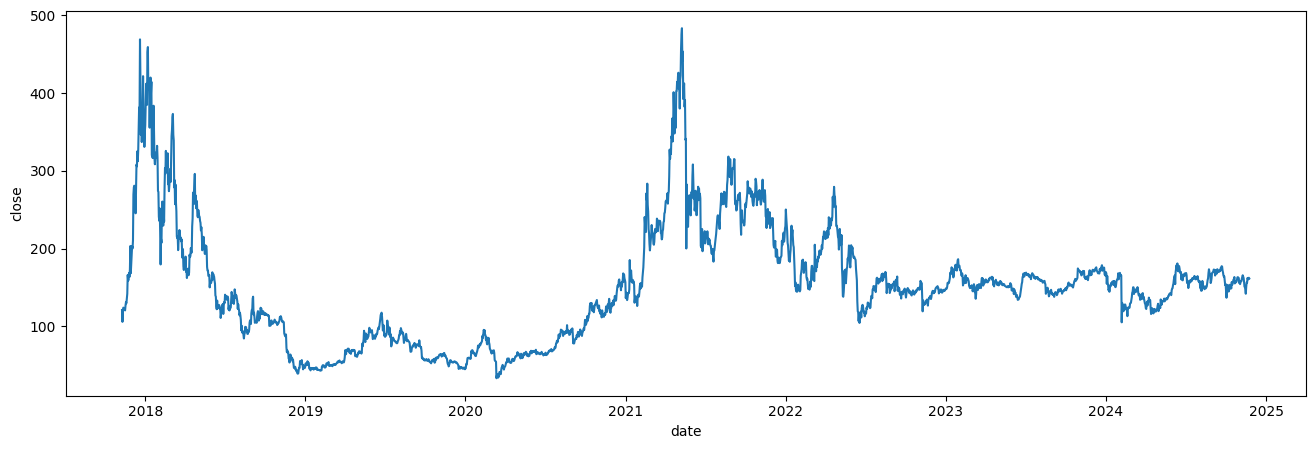

In [17]:
plt.figure(figsize=(16, 5))
sns.lineplot(x="date", y="close", data=df)

In [18]:
df

,date,open,high,low,close,adj close,volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...,...
2567,2024-11-19,156.207169,166.234619,154.980560,162.129410,162.129410,97725726
2568,2024-11-20,162.129410,163.623352,158.716934,160.218994,160.218994,65868511
2569,2024-11-21,160.220078,163.859344,159.331589,160.703293,160.703293,79610785
2570,2024-11-22,160.739395,162.359955,157.191254,162.353333,162.353333,66206916


In [19]:
df.to_parquet("../data/stock_data.parquet")

In [70]:
ticker= yf.Ticker("MSFT")


In [71]:
artical = []
for new  in ticker.get_news():
    artical.append(
        {"title": new["title"],
         "publisher": new["publisher"],
         "link": new["link"],
         "published": new["providerPublishTime"],
         "relatedTickers": new["relatedTickers"] if "relatedTickers" in new else None,
         }
    )


df_artical = pd.DataFrame(artical)

# convert to datetime
df_artical["datetime"] = pd.to_datetime(df_artical["published"], unit='s')

df_artical

,title,publisher,link,published,relatedTickers,datetime
0,Microsoft Corporation (MSFT)-Backed AI Startup...,Insider Monkey,https://finance.yahoo.com/news/microsoft-corpo...,1732465578,[MSFT],2024-11-24 16:26:18
1,Does Billionaire Ken Griffin Know Something Wa...,Motley Fool,https://finance.yahoo.com/m/f8869b5e-be36-3299...,1732462200,"[MSFT, NVDA]",2024-11-24 15:30:00
2,"After Nvidia earnings, is the AI trend still i...",Yahoo Finance,https://finance.yahoo.com/news/after-nvidia-ea...,1732460435,"[AVGO, ARM, GOOG, CRM, QCOM, META, MSFT, MRVL,...",2024-11-24 15:00:35
3,How Much Would It Take To Earn $100 A Month Fr...,Benzinga,https://finance.yahoo.com/news/much-earn-100-m...,1732456830,[MSFT],2024-11-24 14:00:30
4,Bill Gates Unloaded More Microsoft Shares in Q...,Motley Fool,https://finance.yahoo.com/m/b75a5d4a-b891-320c...,1732456800,[MSFT],2024-11-24 14:00:00
5,Could Salesforce and Adobe Help Power the Low-...,Motley Fool,https://finance.yahoo.com/m/c1e5fa5c-650e-3b56...,1732443900,"[ADBE, CRM, MSFT, NVDA, AAPL]",2024-11-24 10:25:00
6,Teradata Corporation (TDC) Launches AI Unlimit...,Insider Monkey,https://finance.yahoo.com/news/teradata-corpor...,1732425474,"[TDC, MSFT]",2024-11-24 05:17:54
7,Microsoft Corporation (MSFT) Unveils New AI Pr...,Insider Monkey,https://finance.yahoo.com/news/microsoft-corpo...,1732413957,[MSFT],2024-11-24 02:05:57


In [72]:

# ticker.actions["Stock Splits"] != 0
# ticker.balance_sheet
# ticker.dividends
# ticker.cashflow
# ticker.major_holders
ticker.get_news()
# ticker.recommendations
# ticker.recommendations_summary
# ticker.history(period="1y", interval="1h")

[{'uuid': '84655fec-fb90-33e1-afcb-d7d166a9e1b0',
  'title': 'Microsoft Corporation (MSFT)-Backed AI Startup d-Matrix Ships First AI Chip, Aiming to Revolutionize User Interactions',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/microsoft-corporation-msft-backed-ai-162618403.html',
  'providerPublishTime': 1732465578,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/FPV7LMJx9t7xViBmxMrZWw--~B/aD04MTY7dz0xNDU2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/ae3cb2a93ad8e5ddf6f94148e71f74b9',
     'width': 1456,
     'height': 816,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/snE9DwM_Mhbq41k5r0NVHA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/ae3cb2a93ad8e5ddf6f94148e71f74b9',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['MSFT']},
 {'uuid': 'f8869b5e-be36-3299-8ef4-fd71d8